In [6]:
using PyPlot
using PyCall
@pyimport matplotlib.animation as anim

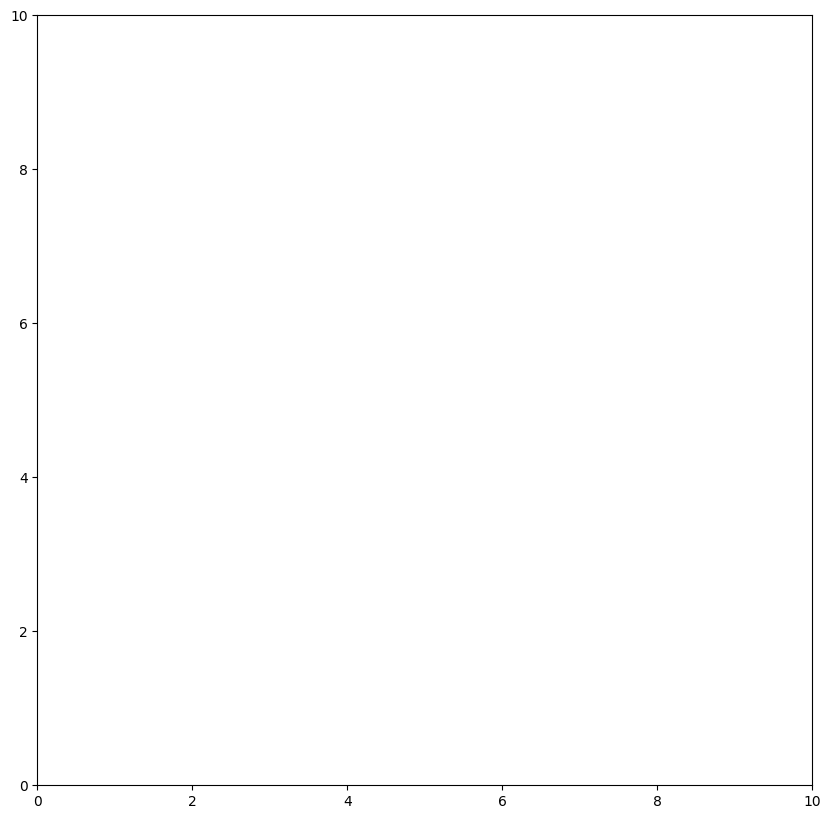

In [8]:
#Construct Figure and Plot Data
fig = figure("MyFigure",figsize=(10,10))
ax = axes(xlim = (0,10),ylim=(0,10))
global line1 = ax[:plot]([],[],"r-")[1]
global line2 = ax[:plot]([],[],"g-")[1]
global line3 = ax[:plot]([],[],"b-")[1]

display(fig)

In [9]:
# Define the init function, which draws the first frame (empty, in this case)
function init()
    global line1
    global line2
    global line3
    line1[:set_data]([],[])
    line2[:set_data]([],[])
    line3[:set_data]([],[])
    return (line1,line2,line3,Union{})  # Union{} is the new word for None
end



init (generic function with 1 method)

In [10]:
# animate draws the i-th frame, where i starts at i=0 as in Python
function animate(i)
    global line1
    global line2
    global line3
    x = (0:i)/10.0
    line1[:set_data](x,x)
    line2[:set_data](1+x,x)
    line3[:set_data](2+x,x)
    return (line1,line2,line3,Union{})
end

animate (generic function with 1 method)

In [11]:
myanim = anim.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

PyObject <matplotlib.animation.FuncAnimation object at 0x7fcfd38433c8>

In [14]:
myanim[:save]("3Lines.mp4", bitrate=-1, extra_args=["-vcodec", "libx264", "-pix_fmt", "yuv420p"])

In [17]:
# Function for creating an embedded video given a filename
function html_video(filename)
    base64_video = base64encode(open(read, filename))
	"""<video controls src="data:video/x-m4v;base64,$base64_video">"""
end

display("text/html", html_video("3Lines.mp4"))